# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [1]:
pip install pandas matplotlib seaborn openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Excel File

In [3]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('Rate of property victimizations by crime type 1993-2023.xlsx')

# Inspect the data
print(df.info())

# Display the first few rows of the dataframe to check the data
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      124 non-null    int64  
 1   Crime Type                124 non-null    object 
 2   Number                    124 non-null    int64  
 3   Number CI Lower Bound     124 non-null    int64  
 4   Number CI Upper Bound     124 non-null    int64  
 5   Number SE                 124 non-null    int64  
 6   Rate per 1000 households  124 non-null    float64
 7   Rate CI Lower Bound       124 non-null    float64
 8   Rate CI Upper Bound       124 non-null    float64
 9   Rate SE                   124 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 9.8+ KB
None


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 households,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Motor vehicle theft,1921179,1731257,2111102,96901,19.3,17.36,21.16,0.97
1,1994,Motor vehicle theft,1924020,1734898,2113142,96493,19.1,17.25,21.01,0.96
2,1995,Motor vehicle theft,1739088,1567959,1910217,87312,17.1,15.45,18.82,0.86
3,1996,Motor vehicle theft,1419576,1268585,1570567,77038,13.8,12.35,15.29,0.75
4,1997,Motor vehicle theft,1460748,1292143,1629352,86024,14.0,12.43,15.67,0.83
5,1998,Motor vehicle theft,1216505,1048716,1384293,85608,11.6,9.96,13.14,0.81
6,1999,Motor vehicle theft,1068125,926931,1209320,72039,10.0,8.65,11.29,0.67
7,2000,Motor vehicle theft,949580,814086,1085074,69131,8.8,7.51,10.01,0.64
8,2001,Motor vehicle theft,1034419,893783,1175055,71754,9.4,8.16,10.72,0.65
9,2002,Motor vehicle theft,1018688,881320,1156055,70087,9.2,7.99,10.48,0.64


## Step 2: Clean and Prepare the Data

In [4]:
# Drop rows with missing values (if needed)
df.dropna(inplace=True)

# Ensure the 'Year' column is an integer and 'Value' is a float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
print(df.isnull().sum())

# Display the cleaned data
df.head(15)

Year                        0
Crime Type                  0
Number                      0
Number CI Lower Bound       0
Number CI Upper Bound       0
Number SE                   0
Rate per 1000 households    0
Rate CI Lower Bound         0
Rate CI Upper Bound         0
Rate SE                     0
dtype: int64


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 households,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Motor vehicle theft,1921179,1731257,2111102,96901,19.3,17.36,21.16,0.97
1,1994,Motor vehicle theft,1924020,1734898,2113142,96493,19.1,17.25,21.01,0.96
2,1995,Motor vehicle theft,1739088,1567959,1910217,87312,17.1,15.45,18.82,0.86
3,1996,Motor vehicle theft,1419576,1268585,1570567,77038,13.8,12.35,15.29,0.75
4,1997,Motor vehicle theft,1460748,1292143,1629352,86024,14.0,12.43,15.67,0.83
5,1998,Motor vehicle theft,1216505,1048716,1384293,85608,11.6,9.96,13.14,0.81
6,1999,Motor vehicle theft,1068125,926931,1209320,72039,10.0,8.65,11.29,0.67
7,2000,Motor vehicle theft,949580,814086,1085074,69131,8.8,7.51,10.01,0.64
8,2001,Motor vehicle theft,1034419,893783,1175055,71754,9.4,8.16,10.72,0.65
9,2002,Motor vehicle theft,1018688,881320,1156055,70087,9.2,7.99,10.48,0.64


## Step 3: Plot Line Graphs Rate per 1000 households

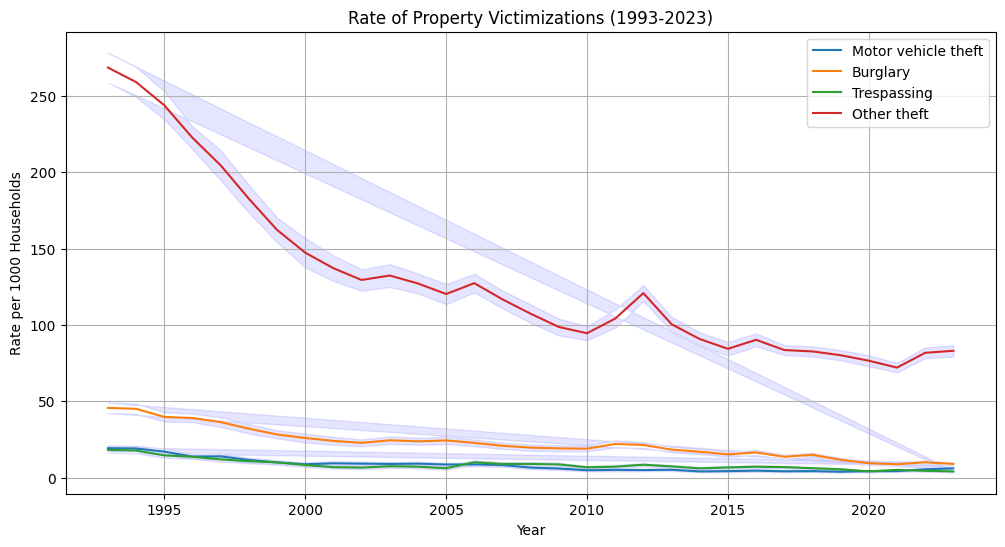

In [5]:
# Plot the 'Rate per 1000 households' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rate per 1000 households', hue='Crime Type', data=df)
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

# Add labels and title
plt.title('Rate of Property Victimizations (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 Households')

# Display the plot with a grid and legend
plt.grid(True)
plt.legend()
plt.show()

## Step 4: Plot Multiple Series Graphs Rate per 1000 households

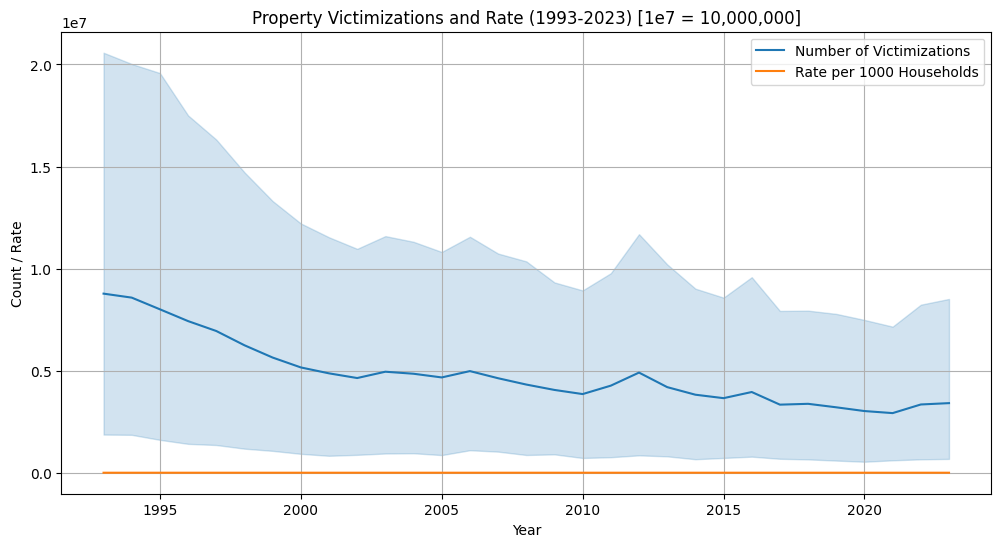

In [6]:
# Plot Multiple Series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number', data=df, label='Number of Victimizations')
sns.lineplot(x='Year', y='Rate per 1000 households', data=df, label='Rate per 1000 Households')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

plt.title('Property Victimizations and Rate (1993-2023) [1e7 = 10,000,000]')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.grid(True)
plt.legend()
plt.show()

## Step 5: Plot Multiple Bar Graphs Rate per 1000 households for each crime type

<Figure size 1200x600 with 0 Axes>

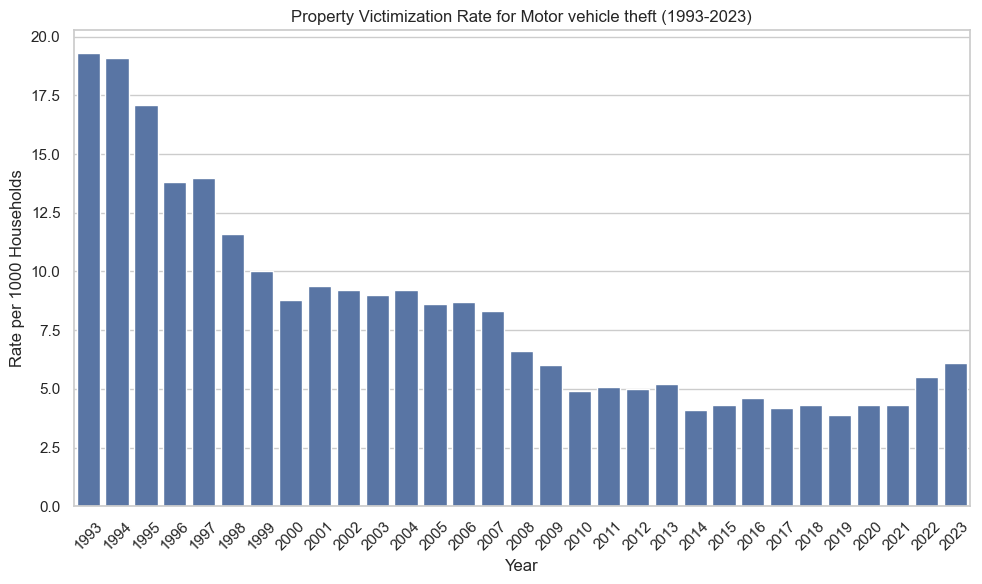

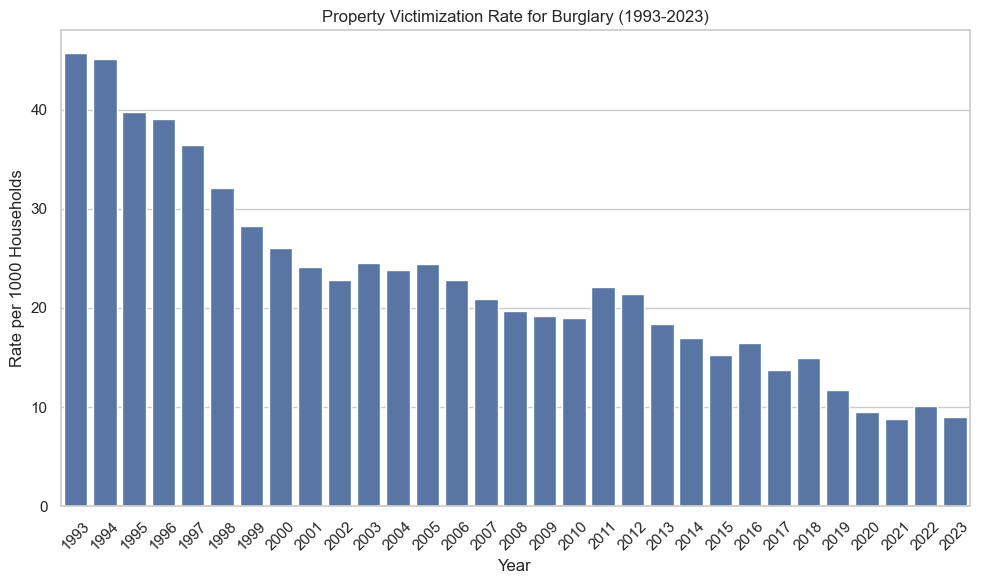

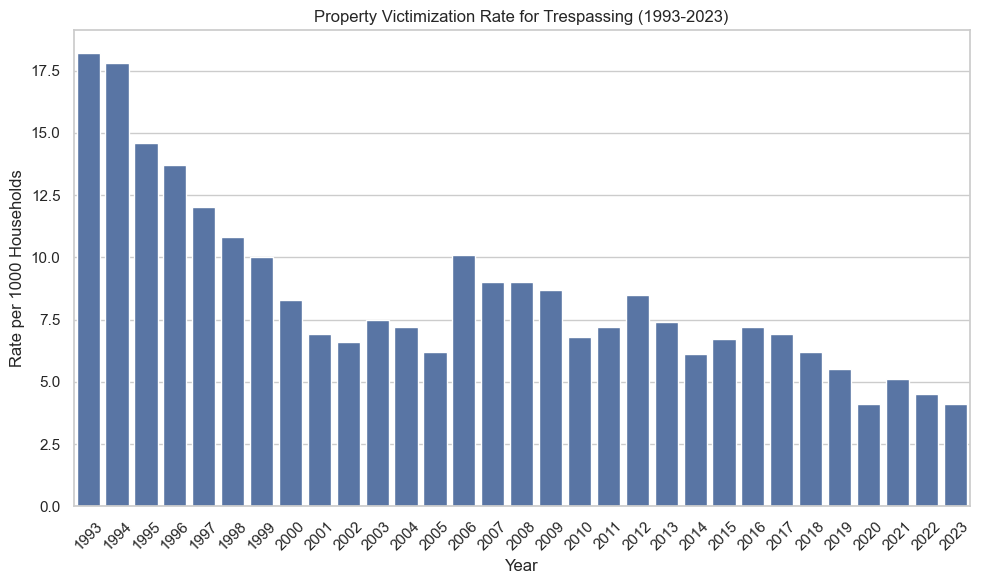

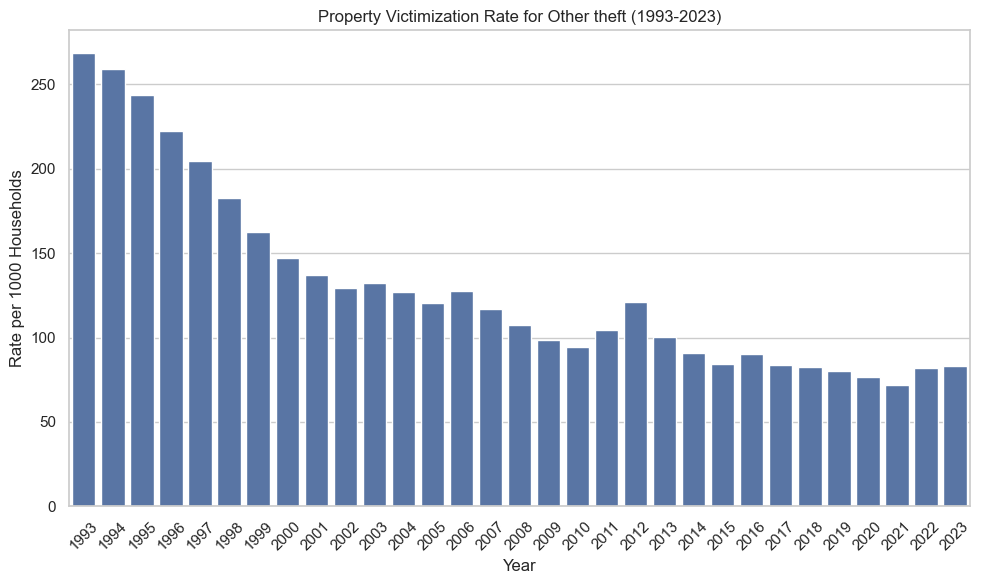

In [7]:
# Set the figure size and style for seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Loop through each unique crime type and create individual bar plots
for crime_type in df['Crime Type'].unique():
    # Filter the dataframe by the current crime type
    crime_data = df[df['Crime Type'] == crime_type]
    
    # Create a new figure for each crime type
    plt.figure(figsize=(10, 6))
    
    # Plot a bar graph for each crime type by year
    sns.barplot(x='Year', y='Rate per 1000 households', data=crime_data, color='b')
    
    # Add title and labels
    plt.title(f'Property Victimization Rate for {crime_type} (1993-2023)')
    plt.xlabel('Year')
    plt.ylabel('Rate per 1000 Households')
    
    # Show the bar plot
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Adjust the layout to fit everything
    
    # Show the plot
    plt.show()